### SVR
### Importing Libraries & Dataset

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
dataset = pd.read_csv('/Users/liakooras/Desktop/UDEMIES/MACHINE LEARNING A-Z/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Python/Position_Salaries.csv')
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [92]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [93]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [94]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


### Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
sc = StandardScaler()
sc2 = StandardScaler()

In [98]:
y = y.reshape(len(y), 1)

In [99]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [100]:
X = sc.fit_transform(X)
y = sc2.fit_transform(y)

In [101]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [102]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training the SVR model on the whole dataset

In [104]:
from sklearn.svm import SVR

In [105]:
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predict a new result

In [107]:
sc2.inverse_transform(regressor.predict(sc.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Visualising SVR results

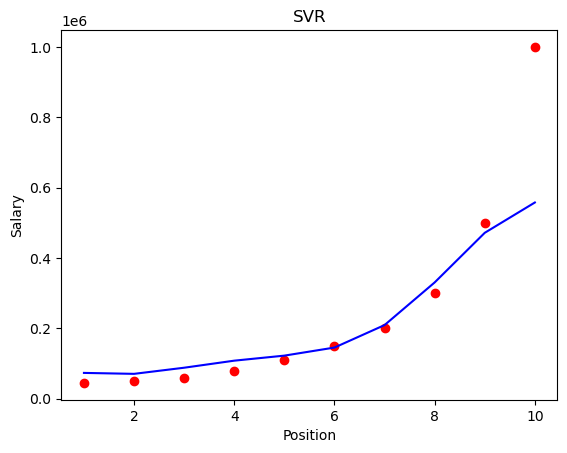

In [132]:
plt.scatter(sc.inverse_transform(X), sc2.inverse_transform(y), color= 'red')
plt.plot(sc.inverse_transform(X), sc2.inverse_transform(regressor.predict(X).reshape(-1,1)),color='blue')
plt.title('SVR')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

### Visualising the SVR results ( higher resolution & smoother curve )

In [ ]:
X_grid = np.arange(min(sc.inverse_transform(X)),max(sc.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc.inverse_transform(X),sc2.inverse_transform(y),color = 'red')
plt.plot(X_grid, sc2.inverse_transform(regressor.predict(sc.transform(X_grid)).reshape(-1,1)),color='blue')
plt.title('SVR')